In [24]:
!jt -t monokai -T -N -kl

In [138]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [28]:
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
]

file_names = [f"Sales_Data/Sales_{month}_2019.csv" for month in months]
data=pd.DataFrame()

for file in file_names:
    data = pd.concat([data, pd.read_csv(file)], ignore_index=True) 
data.to_csv('./Sales_Data/alldata.csv')

## Data Cleaning

In [29]:
data = data[data['Order Date'].str[0:2] != 'Or']
nan_df = data[data.isna().any(axis=1)]
data = data.dropna(how='all')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## New Data Columns

In [31]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

data['Month'] = data['Order Date'].str[0:2]

In [32]:
data.head()
#data['test'] = data.apply(lambda)
#data['Sales'] = data.apply(lambda x: (pd.to_numeric(x['Quantity Ordered'], errors='coerce') * pd.to_numeric(x['Price Each'], errors='coerce')))
#data['Sales'] = data.apply(lambda x: (pd.to_numeric(x['Quantity Ordered'], errors='coerce') * pd.to_numeric(x['Price Each'], errors='coerce')) if pd.notna(x['Quantity Ordered']) and pd.notna(x['Price Each']) else pd.NaT, axis=1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,01


In [169]:
data.groupby('Month').sum(numeric_only = True)
#sales_by_month = grouped_by_month.apply(lambda x: (pd.to_numeric(x['Quantity Ordered'], errors='coerce') * pd.to_numeric(x['Price Each'], errors='coerce')).sum())

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1811768.38,1822256.73
02,13449,2188884.72,2202022.42
03,17005,2791207.83,2807100.38
04,20558,3367671.02,3390670.24
05,18667,3135125.13,3152606.75
06,15253,2562025.61,2577802.26
07,16072,2632539.56,2647775.76
08,13448,2230345.42,2244467.88
09,13109,2084992.09,2097560.13


In [123]:
print(sales_by_month)
print('$' + str(max(sales_by_month)),sales_by_month.idxmax())

Order Date
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
dtype: float64
$4613443.339999999 12


In [78]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.head
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

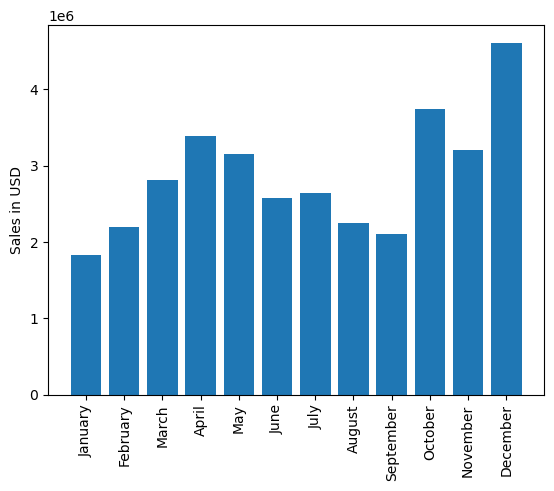

In [124]:
import matplotlib.pyplot as plt
plt.bar(months,sales_by_month)
plt.xticks(rotation='vertical')
plt.ylabel('Sales in USD')
plt.show()

In [125]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [126]:
data['City'] = data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
data['State'] = data['Purchase Address'].apply(lambda x: x.split(',')[2].split()[0].strip())
data['Zipcode'] = data['Purchase Address'].apply(lambda x: x.split(',')[2].split()[1].strip())
data['Street'] = data['Purchase Address'].apply(lambda x: x.split(',')[0].strip())

In [127]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,Zipcode,Street
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Boston,MA,02215,944 Walnut St
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Portland,OR,97035,185 Maple St
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",San Francisco,CA,94016,538 Adams St
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA,90001,738 10th St
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Austin,TX,73301,387 10th St


In [129]:
grouped_by_city = data.groupby(data['City'])

In [130]:
grouped_by_city.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,Zipcode,Street
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Boston,MA,02215,944 Walnut St
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Portland,OR,97035,185 Maple St
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",San Francisco,CA,94016,538 Adams St
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA,90001,738 10th St
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Austin,TX,73301,387 10th St
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",San Francisco,CA,94016,775 Willow St
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",Los Angeles,CA,90001,979 Park St
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016",San Francisco,CA,94016,181 6th St
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",Los Angeles,CA,90001,867 Willow St
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016",San Francisco,CA,94016,657 Johnson St
